# GOAL



- Our goal is to forecast weekly sales from a particular department based on historical data.
- This dataset contains weekly sales from 99 departments belonging to 45 different stores.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

In [2]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [3]:
# "stores" contains type and size of store related to the 45 stores.

stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
# Features dataframe contains additional data related to the store, 
#department, and regional activity for the given dates(Weekly)

feature

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [5]:
# "Sales" dataframe contains historical sales data, which covers 2010-02-05 to 2012-11-01. 
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [6]:
# Change date to standard data type
feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

/tmp/ipykernel_22728/1288599467.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  feature['Date'] = pd.to_datetime(feature['Date'])
/tmp/ipykernel_22728/1288599467.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales['Date'] = pd.to_datetime(sales['Date'])


In [7]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


MERGE DATASET INTO ONE DATAFRAME

In [9]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])


In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [11]:
df = pd.merge(df, stores, on = ['Store'], how = 'left') #left join

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [13]:
x = df['Date']
def get_month(x):
    return int(str(x).split('-')[1])

In [14]:
df['month'] = df['Date'].apply(get_month)

In [15]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,month
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
1,1,2,2010-05-02,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
2,1,3,2010-05-02,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
3,1,4,2010-05-02,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
4,1,5,2010-05-02,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,10


EXPLORE MERGED DATASET

In [16]:
df.duplicated().any()

False

In [17]:
df.isnull().any()


Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI             False
Unemployment    False
Type            False
Size            False
month           False
dtype: bool

In [18]:
# Fill up NaN elements with zeros
df = df.fillna(0)
df.isnull().any()

Store           False
Dept            False
Date            False
Weekly_Sales    False
IsHoliday       False
Temperature     False
Fuel_Price      False
MarkDown1       False
MarkDown2       False
MarkDown3       False
MarkDown4       False
MarkDown5       False
CPI             False
Unemployment    False
Type            False
Size            False
month           False
dtype: bool

# DATA ANALYSIS

In [24]:
# Create pivot tables to understand the relationship in the data
pivot_1 = pd.pivot_table(df, values = 'Weekly_Sales', columns = ['Type'], index = ['Date', 'Store', 'Dept'],
                    aggfunc= np.mean)
pivot_1

Type                          A         B   C
Date       Store Dept                        
2010-01-10 1     1     20094.19       NaN NaN
                 2     45829.02       NaN NaN
                 3      9775.17       NaN NaN
                 4     34912.45       NaN NaN
                 5     23381.38       NaN NaN
...                         ...       ...  ..
2012-12-10 45    93         NaN   2644.24 NaN
                 94         NaN   4041.28 NaN
                 95         NaN  49334.77 NaN
                 97         NaN   6463.32 NaN
                 98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [25]:
pivot_2 = pd.pivot_table(df, values = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], columns = ['IsHoliday'], index = ['Date', 'Store','Dept'],
                    aggfunc={'MarkDown1' : np.mean,'MarkDown2' : np.mean, 'MarkDown3' : np.mean, 'MarkDown4' : np.mean, 'MarkDown5' : np.mean})
pivot_2

MarkDown1       MarkDown2       MarkDown3        \
IsHoliday                 False True      False True      False True    
Date       Store Dept                                                   
2010-01-10 1     1         0.00   NaN       0.0   NaN      0.00   NaN   
                 2         0.00   NaN       0.0   NaN      0.00   NaN   
                 3         0.00   NaN       0.0   NaN      0.00   NaN   
                 4         0.00   NaN       0.0   NaN      0.00   NaN   
                 5         0.00   NaN       0.0   NaN      0.00   NaN   
...                         ...   ...       ...   ...       ...   ...   
2012-12-10 45    93     1956.28   NaN       0.0   NaN      7.89   NaN   
                 94     1956.28   NaN       0.0   NaN      7.89   NaN   
                 95     1956.28   NaN       0.0   NaN      7.89   NaN   
                 97     1956.28   NaN       0.0   NaN      7.89   NaN   
                 98     1956.28   NaN       0.0   NaN      7.89   NaN   

                      MarkDown4       MarkDown5        
IsHoliday                 False True      False True   
Date       Store Dept                                  
2010-01-10 1     1         0.00   NaN      0.00   NaN  
                 2         0.00   NaN      0.00   NaN  
                 3         0.00   NaN      0.00   NaN  
                 4         0.00   NaN      0.00   NaN  
                 5         0.00   NaN      0.00   NaN  
...                         ...   ...       ...   ...  
2012-12-10 45    93      599.32   NaN   3990.54   NaN  
                 94      599.32   NaN   3990.54   NaN  
                 95      599.32   NaN   3990.54   NaN  
                 97      599.32   NaN   3990.54   NaN  
                 98      599.32   NaN   3990.54   NaN  

[421570 rows x 10 columns]

/tmp/ipykernel_22728/1886026454.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(columns = ['Store']).corr(), annot = True)


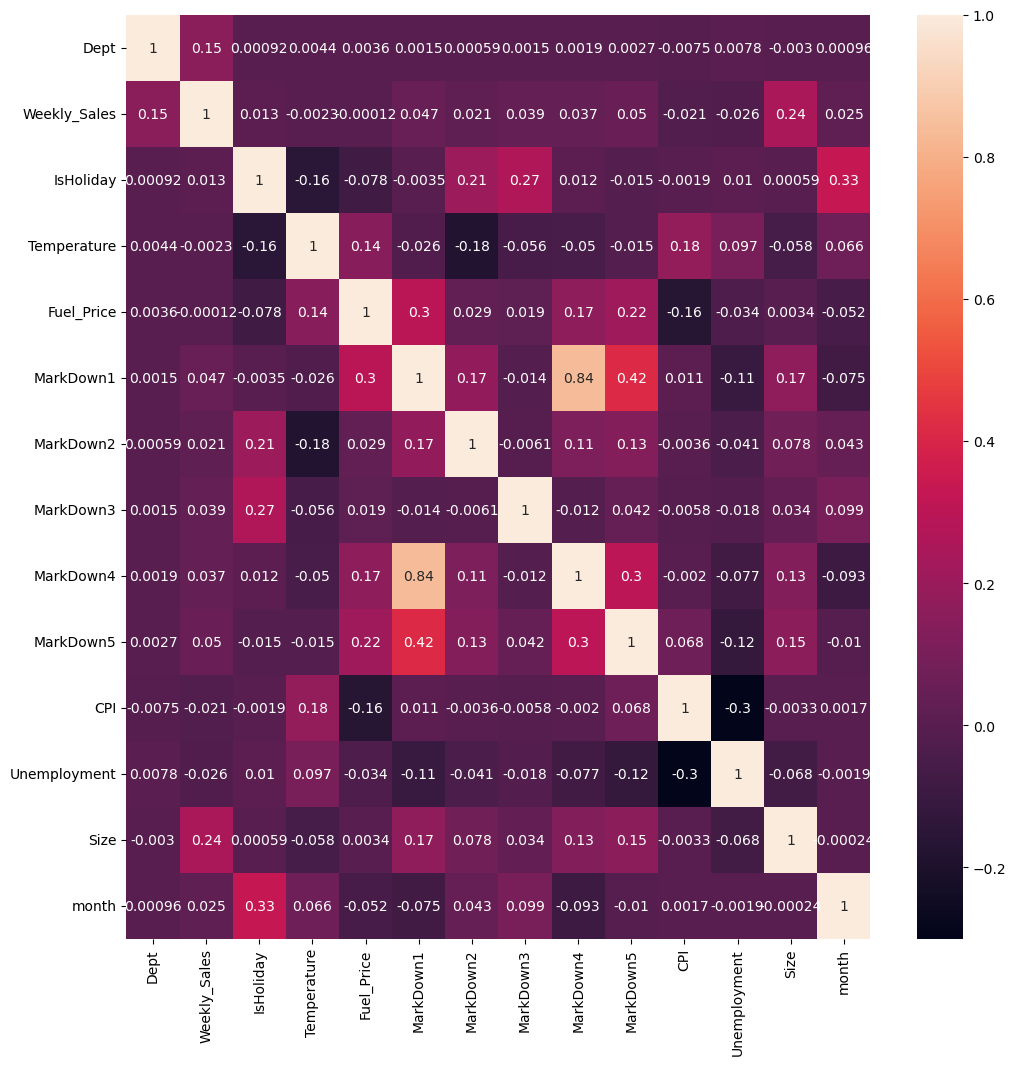

In [29]:
plt.figure(figsize = (12,12))
sns.heatmap(df.drop(columns = ['Store']).corr(), annot = True)
plt.show()

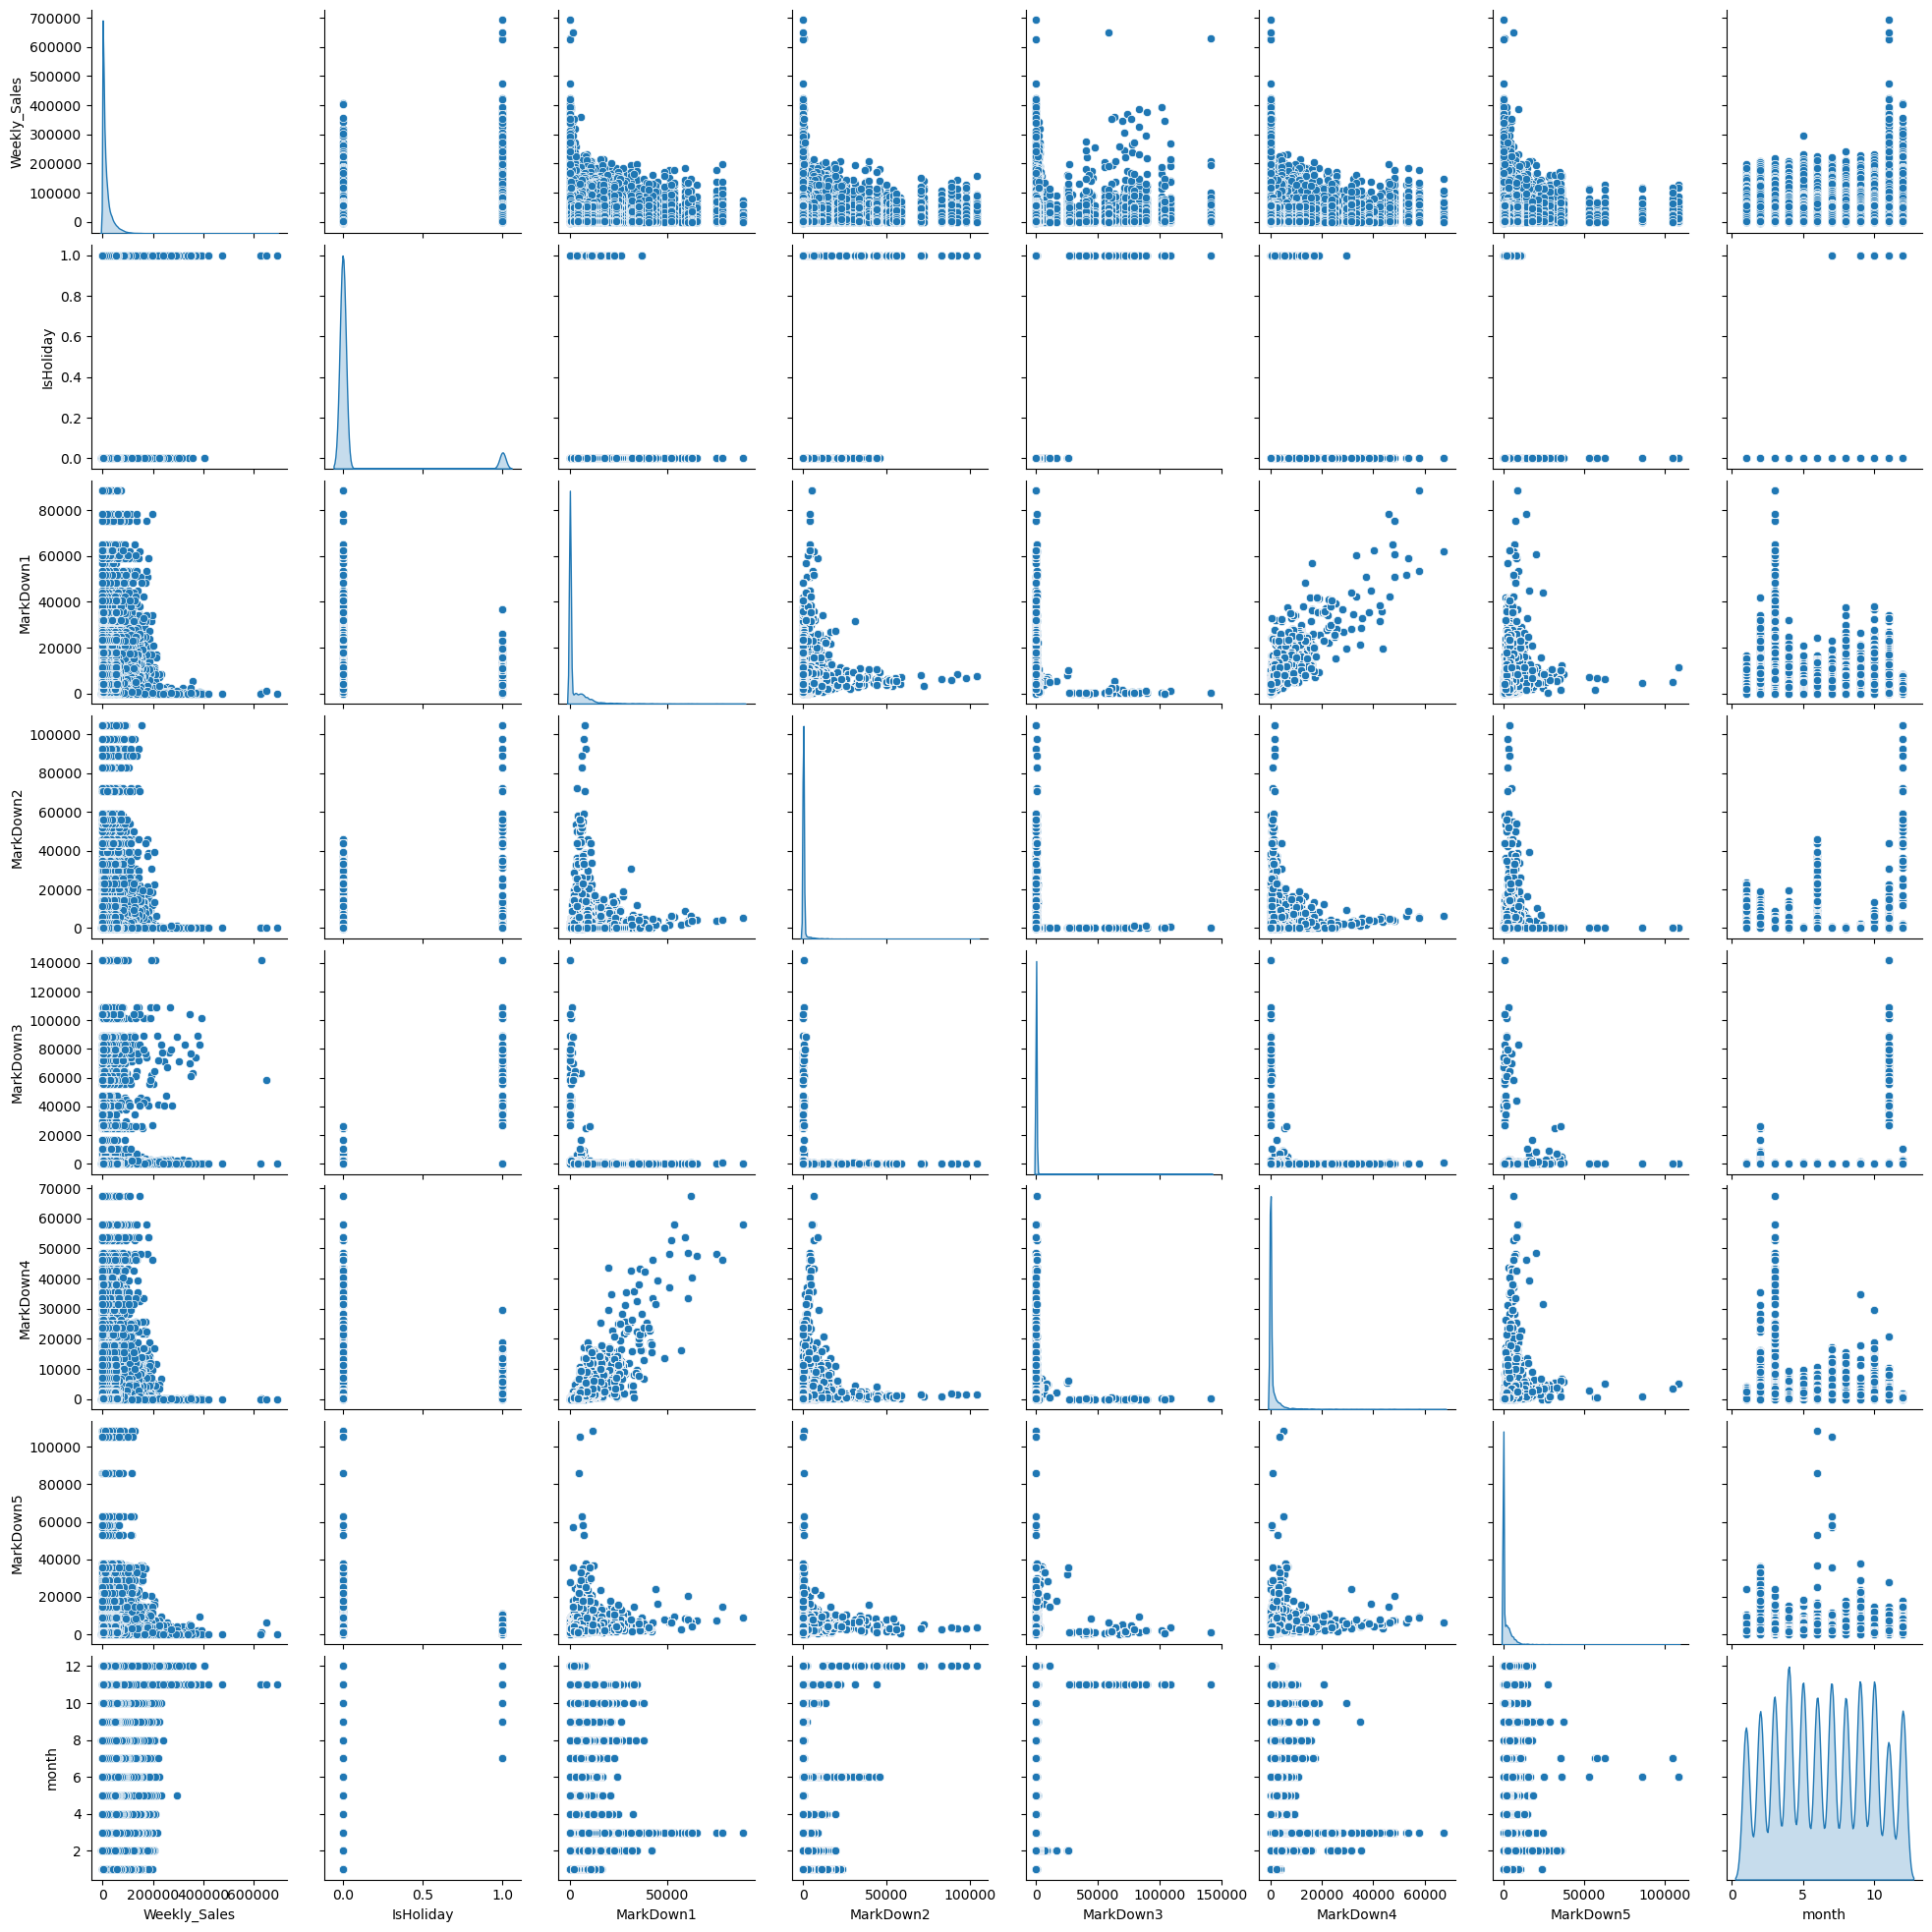

In [34]:
sns.pairplot(df[["Weekly_Sales","IsHoliday","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","Type","month"]], diag_kind = "kde")

# TASK #8: PREPARE THE DATA BEFORE TRAINING

In [35]:
# Drop the date
df_target_y = df['Weekly_Sales']
df_features = df.drop(columns = ['Weekly_Sales', 'Date'])

In [38]:
df_features = pd.get_dummies(df_features, columns = ['Type', 'Store', 'Dept'], drop_first = True)

In [40]:
df_features.shape

(421570, 138)

In [41]:
df_target_y.shape

(421570,)

In [43]:
X = np.array(df_features).astype('float32')
y = np.array(df_target_y).astype('float32')

In [44]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [45]:
# spliting the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

#  TRAIN THE MODEL BY XGBOOST

In [46]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 1.4 MB/s eta 0:00:0000:0100:01


In [55]:
import xgboost as xgb
xg_boost_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 10, n_estimators = 100)
xg_boost_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [56]:
# prediction
y_predict = xg_boost_reg.predict(X_test)
Accuracy = xg_boost_reg.score(X_test, y_test)
print("Accuracy : {}".format(Accuracy))

Accuracy : 0.916005533860542


In [57]:
from sklearn.metrics import r2_score, mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('MSE =',MSE,'\nR2 =', r2) 

MSE = 42168710.0 
R2 = 0.916005533860542


# TRAIN XGBOOST USING SAGEMAKER

In [61]:
#in xgboost training first column should be the target column
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]
train_data.head(10)

/tmp/ipykernel_22728/3718135686.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,i]
/tmp/ipykernel_22728/3718135686.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[i] = X_train[:,i]
/tmp/ipykernel_22728/3718135686.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.c

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,79.260002,0.0,81.260002,3.574,196.399994,0.0,0.0,0.0,1012.909973,220.852676,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,355.410004,0.0,70.279999,2.603,0.000000,0.0,0.0,0.0,0.000000,211.329880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25205.699219,0.0,60.520000,3.809,0.000000,0.0,0.0,0.0,0.000000,136.314499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5556.640137,0.0,54.650002,3.633,0.000000,0.0,0.0,0.0,0.000000,136.472000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13909.950195,0.0,68.110001,2.720,0.000000,0.0,0.0,0.0,0.000000,212.369186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,117474.468750,0.0,87.959999,3.523,0.000000,0.0,0.0,0.0,0.000000,215.733231,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,19552.839844,0.0,51.410000,2.771,0.000000,0.0,0.0,0.0,0.000000,211.889679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,72.639999,0.0,71.820000,3.013,0.000000,0.0,0.0,0.0,0.000000,126.279167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20608.320312,0.0,31.530001,2.666,0.000000,0.0,0.0,0.0,0.000000,126.442062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,15330.269531,0.0,67.089996,3.820,0.000000,0.0,0.0,0.0,0.000000,136.183136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
test_data = pd.DataFrame({'Target':y_test[:,0]})
for i in range(X_test.shape[1]):
    test_data[i] = X_test[:,i]

/tmp/ipykernel_22728/2271349720.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[i] = X_test[:,i]
/tmp/ipykernel_22728/2271349720.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[i] = X_test[:,i]
/tmp/ipykernel_22728/2271349720.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy(

In [65]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

/tmp/ipykernel_22728/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_data[i] = X_val[:,i]
/tmp/ipykernel_22728/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_data[i] = X_val[:,i]
/tmp/ipykernel_22728/565076207.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  va

In [66]:
# save data as csv files.
train_data.to_csv('train.csv', header = False, index = False)
test_data.to_csv('test.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [67]:
import sagemaker
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()
bucket = 'sagemaker--project' 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
role = sagemaker.get_execution_role()

In [68]:
import os
with open('train.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker--project/XGBoost-Regressor/train/XGBoost-Regressor


In [69]:
import os
with open('test.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(f)
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded test data location: {}'.format(s3_test_data))

uploaded test data location: s3://sagemaker--project/XGBoost-Regressor/test/XGBoost-Regressor


In [70]:
with open('validation.csv','rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', key)).upload_fileobj(f)
s3_validation_data = 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker--project/XGBoost-Regressor/validation/XGBoost-Regressor


In [71]:
output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker--project/XGBoost-Regressor/output


In [73]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'xgboost','1.7-1') # Latest version of XGboost

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [79]:
Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)
# tunned parameters
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [80]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')

data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor1.fit(data_channels)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-05-02-19-53-48-806


2023-05-02 19:53:51 Starting - Starting the training job...
2023-05-02 19:54:06 Starting - Preparing the instances for training...
2023-05-02 19:54:53 Downloading - Downloading input data......
2023-05-02 19:55:44 Training - Training image download completed. Training in progress...[2023-05-02 19:56:01.528 ip-10-0-168-188.ca-central-1.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-05-02 19:56:01.598 ip-10-0-168-188.ca-central-1.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2023-05-02:19:56:01:INFO] Imported framework sagemaker_xgboost_container.training
[2023-05-02:19:56:01:INFO] Failed to parse hyperparameter objective value reg:linear to Json.
Returning the value itself
[2023-05-02:19:56:01:INFO] No GPUs detected (normal if no gpus installed)
[2023-05-02:19:56:01:INFO] Running XGBoost Sagemaker in algorithm mode
[2023-05-02:19:56:01:INFO] Determined 0 GPU(s) available on the instance.
[2023-05-02:19:56:01:INFO] Det

 DEPLOY THE MODEL 

In [81]:
Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

INFO:sagemaker:Creating model with name: sagemaker-xgboost-2023-05-02-20-01-50-223
INFO:sagemaker:Creating endpoint-config with name sagemaker-xgboost-2023-05-02-20-01-50-223
INFO:sagemaker:Creating endpoint with name sagemaker-xgboost-2023-05-02-20-01-50-223


---!

In [83]:
from sagemaker.predictor import csv_serializer, json_deserializer
Xgboost_regressor.serializer = csv_serializer

In [84]:
from sklearn.metrics import r2_score, mean_squared_error
MSE = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print('MSE =',MSE,'\nR2 =', r2) 

MSE = 42168710.0 
R2 = 0.916005533860542


In [85]:
# Delete the end-point
Xgboost_regressor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-05-02-20-01-50-223
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-05-02-20-01-50-223
